In [7]:
import pandas as pd
import numpy as np

In [8]:

df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.describe()

transaction_summary = df.groupby('type')['amount'].agg(['sum', 'mean', 'count'])
transaction_summary


,sum,mean,count
type,,,
CASH_IN,2.363674e+11,168920.242004,1399284
CASH_OUT,3.944130e+11,176273.964346,2237500
DEBIT,2.271992e+08,5483.665314,41432
PAYMENT,2.809337e+10,13057.604660,2151495
TRANSFER,4.852920e+11,910647.009645,532909


In [15]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

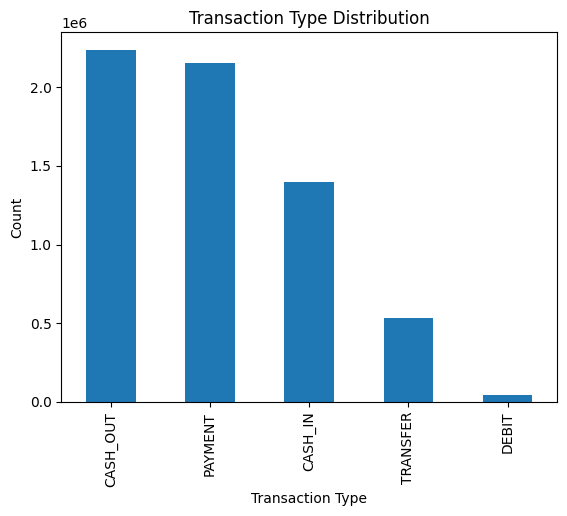

In [16]:
import matplotlib.pyplot as plt

transaction_counts = df['type'].value_counts()
transaction_counts.plot(kind='bar')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


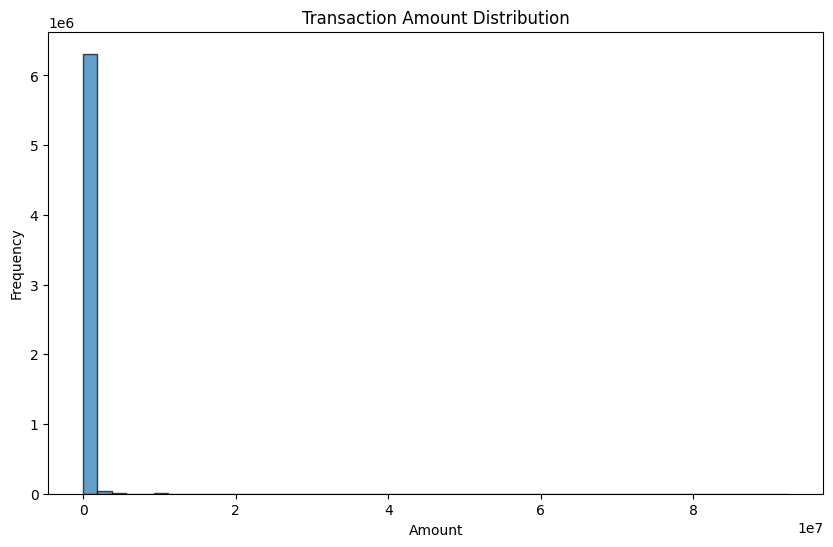

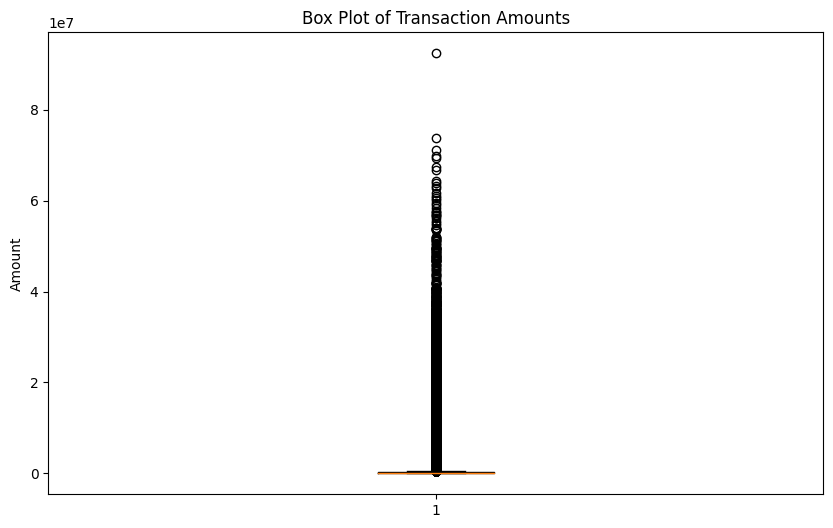

In [17]:

plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['amount'])
plt.title('Box Plot of Transaction Amounts')
plt.ylabel('Amount')
plt.show()


Total Fraudulent Transactions: 8213
Percentage of Fraudulent Transactions: 0.13%


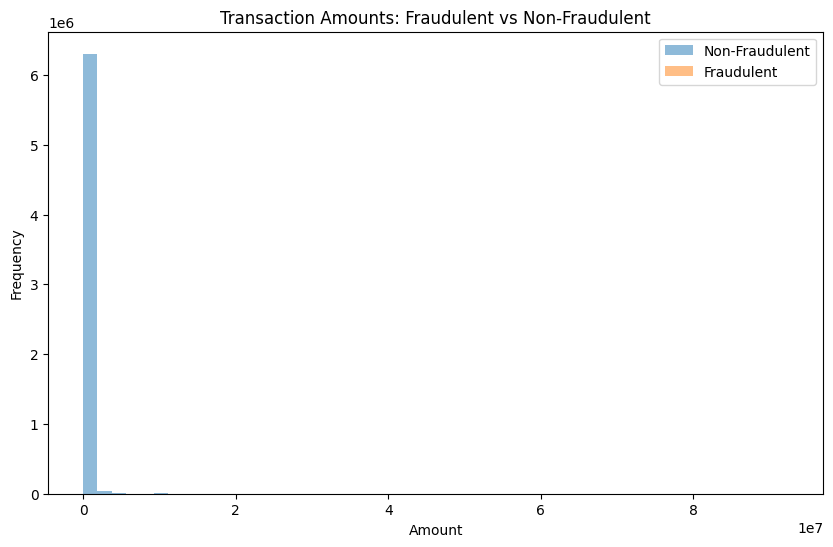

In [18]:

fraud_transactions = df[df['isFraud'] == 1]
print(f"Total Fraudulent Transactions: {fraud_transactions.shape[0]}")
print(f"Percentage of Fraudulent Transactions: {(fraud_transactions.shape[0] / df.shape[0]) * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.hist(df[df['isFraud'] == 0]['amount'], bins=50, alpha=0.5, label='Non-Fraudulent')
plt.hist(fraud_transactions['amount'], bins=50, alpha=0.5, label='Fraudulent')
plt.title('Transaction Amounts: Fraudulent vs Non-Fraudulent')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Total High-Value Transactions: 1673570
Percentage of High-Value Transactions: 26.30%


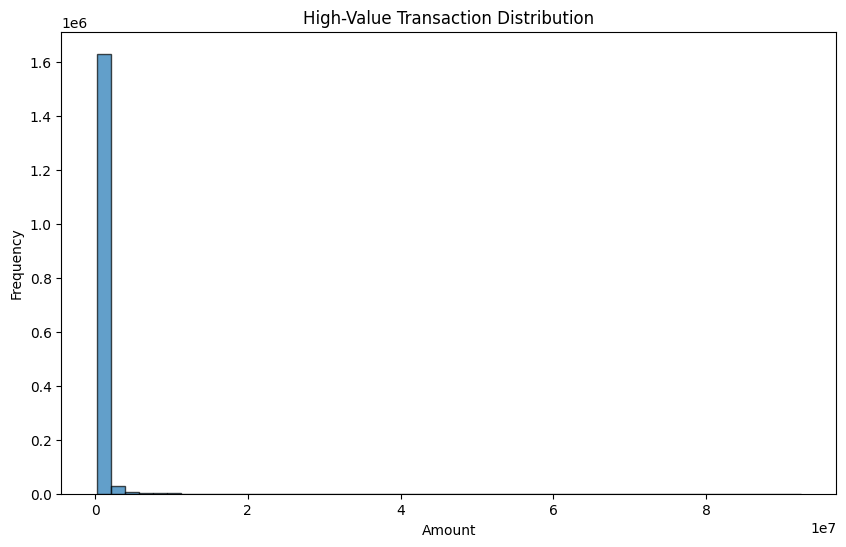

In [19]:

high_value_trans = df[df['amount'] > 200000]
print(f"Total High-Value Transactions: {high_value_trans.shape[0]}")
print(f"Percentage of High-Value Transactions: {(high_value_trans.shape[0] / df.shape[0]) * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.hist(high_value_trans['amount'], bins=50, edgecolor='k', alpha=0.7)
plt.title('High-Value Transaction Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest   
amount          1.000000      -0.002762       -0.007861        0.294137  \
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   

                newbalanceDest  
amount                0.459304  
oldbalanceOrg         0.042029  
newbalanceOrig        0.041837  
oldbalanceDest        0.976569  
newbalanceDest        1.000000  


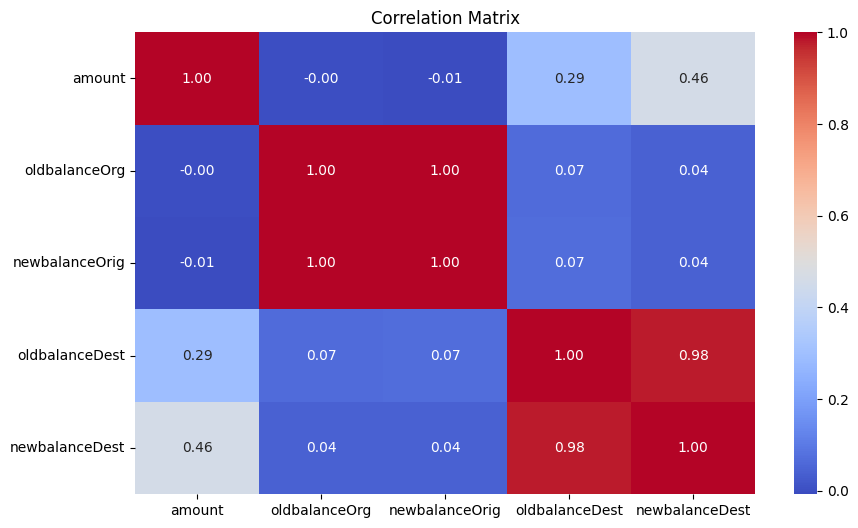

In [22]:
# Correlation matrix
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()
print(correlation_matrix)

# Heatmap of correlations
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:

fraud_count = df['isFraud'].sum()
print(f"Total Fraudulent Transactions: {fraud_count}")

fraud_percentage = (fraud_count / df.shape[0]) * 100
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")


Total Fraudulent Transactions: 8213
Percentage of Fraudulent Transactions: 0.13%


In [11]:

average_amount = df['amount'].mean()


high_value_transfers = df[df['amount'] > 200000]
percentage_high_value = (high_value_transfers.shape[0] / df.shape[0]) * 100


swot_analysis = {
    "Strengths": [
        f"High average transaction amount: ${average_amount:.2f}",
        f"Ability to detect fraudulent transactions effectively."
    ],
    "Weaknesses": [
        f"Significant number of high-value transactions flagged as fraud.",
        f"Potential data gaps or inaccuracies in transaction records."
    ],
    "Opportunities": [
        f"Improving fraud detection algorithms to reduce false positives.",
        f"Enhancing security measures for high-value transactions."
    ],
    "Threats": [
        f"High-value transactions are targeted by fraudsters.",
        f"Potential system vulnerabilities leading to data breaches."
    ]
}

for category, points in swot_analysis.items():
    print(f"{category}:")
    for point in points:
        print(f"  - {point}")


Strengths:
  - High average transaction amount: $179861.90
  - Ability to detect fraudulent transactions effectively.
Weaknesses:
  - Significant number of high-value transactions flagged as fraud.
  - Potential data gaps or inaccuracies in transaction records.
Opportunities:
  - Improving fraud detection algorithms to reduce false positives.
  - Enhancing security measures for high-value transactions.
Threats:
  - High-value transactions are targeted by fraudsters.
  - Potential system vulnerabilities leading to data breaches.


In [12]:


market_risk = np.std(df['amount'])
print(f"Market Risk (Standard Deviation of Amounts): ${market_risk:.2f}")

operational_risk = np.std(df['amount'])
print(f"Operational Risk (Standard Deviation of Amounts): ${operational_risk:.2f}")


Market Risk (Standard Deviation of Amounts): $603858.18
Operational Risk (Standard Deviation of Amounts): $603858.18


In [23]:
import xlsxwriter

# Create an Excel file
workbook = xlsxwriter.Workbook('Financial_Health_Assessment_Report_ayrja.xlsx')
worksheet = workbook.add_worksheet()

# Set formats
bold_format = workbook.add_format({'bold': True})
text_wrap_format = workbook.add_format({'text_wrap': True})

# Title
worksheet.merge_range('B1:E1', 'Financial Health Assessment Report', bold_format)

# SWOT Analysis
worksheet.write('A3', 'SWOT Analysis', bold_format)
row = 4
for category, points in swot_analysis.items():
    worksheet.write(row, 0, category, bold_format)
    row += 1
    for point in points:
        worksheet.write(row, 0, point, text_wrap_format)
        row += 1
    row += 1

# Risk Evaluation
worksheet.write(row, 0, 'Financial Risk Evaluation', bold_format)
worksheet.write(row + 1, 0, f"Market Risk (Standard Deviation of Amounts): ${market_risk:.2f}", text_wrap_format)
worksheet.write(row + 2, 0, f"Operational Risk (Standard Deviation of Amounts): ${operational_risk:.2f}", text_wrap_format)

workbook.close()
